# Exercises Working with Time Series

In [4]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import requests
from vega_datasets import data

### SF TEMPS

Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [5]:
temps = data.sf_temps()

In [7]:
# look at how much data there is
# looks like 'date' needs to be set as the index
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [9]:
# reset index to the date time object
temps = temps.set_index('date').sort_index()

In [10]:
# resample by day and take average temp
temps.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


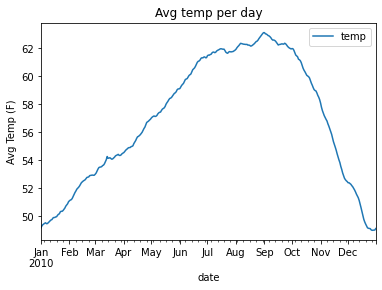

In [15]:
# visualize avg temp
temps.resample('D').mean().plot()
plt.title('Avg temp per day')
plt.ylabel('Avg Temp (F)')
plt.show()

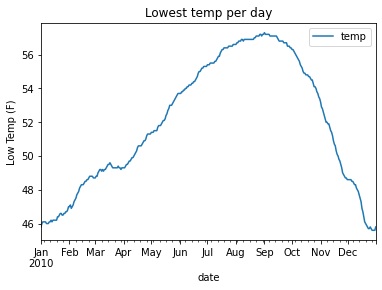

In [16]:
# visualize minimum temp over time (using Days)
temps.resample('D').min().plot()
plt.title('Lowest temp per day')
plt.ylabel('Low Temp (F)')
plt.show()

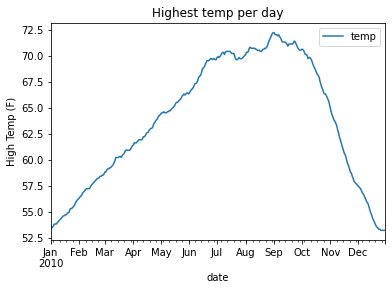

In [17]:
# visualize max temp over time
temps.resample('D').max().plot()
plt.title('Highest temp per day')
plt.ylabel('High Temp (F)')
plt.show()

In [30]:
# find coldest month on average - January 
# (there's only data from 2010)
temps.resample('M').mean().sort_values(by='temp').head(1)

,temp
date,
2010-01-31,49.98414


In [32]:
# find hottest month on average - September
temps.resample('M').mean().sort_values(by='temp', ascending= False).head(1)

,temp
date,
2010-09-30,62.487083


In [38]:
# Resample by the day and calculate the min and max temp for the day 
# (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day.
# Which month has the highest daily temperature variability?

min_max_temps = temps.resample('D').agg(['min', 'max'])

min_max_temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Freq: D
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (temp, min)  365 non-null    float64
 1   (temp, max)  365 non-null    float64
dtypes: float64(2)
memory usage: 16.7 KB


In [39]:
# need to rename columns temp,min and temp, max
min_max_temps.columns = ["_".join(x) for x in min_max_temps.columns.ravel()]

<ipython-input-39-59a2145431db>:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  min_max_temps.columns = ["_".join(x) for x in min_max_temps.columns.ravel()]


In [41]:
# look at new column names
min_max_temps.head()

,temp_min,temp_max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [44]:
# create new column name 
min_max_temps['difference'] = min_max_temps['temp_max'] - min_max_temps['temp_min']

In [51]:
# resample by month and sort the values
min_max_temps.resample('M').mean().difference.sort_values(ascending = False).head(1)

# Month witth highest varience is September 

date
2010-09-30    14.403333
Name: difference, dtype: float64

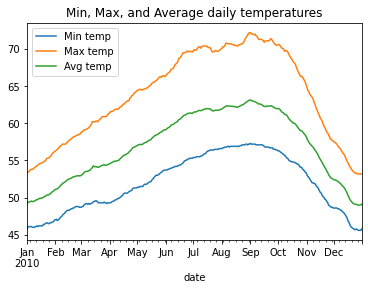

In [63]:
# # Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, 
# i.e. the min, average, and maximum temperature should be 3 seperate lines.

temps.resample('D').min().temp.plot(label = 'Min temp')
temps.resample('D').max().temp.plot(label = 'Max temp')
temps.resample('D').mean().temp.plot(label = 'Avg temp')
plt.legend()
plt.title('Min, Max, and Average daily temperatures')
plt.show()

------ 
### Seattle Weather
``` python
from vega_datasets import data
data.seattle_weather()
```
Use the dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

In [68]:
# get dataframe
weather = data.seattle_weather()

In [65]:
# look at data
# looks like 'date' is already a datetime object but needs to be set as index
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [72]:
weather.date.min(), weather.date.max()

(Timestamp('2012-01-01 00:00:00'), Timestamp('2015-12-31 00:00:00'))

#### Data info
- Looks like dates go from January 2012, to December 2015 
- covers 4 full years
- appears to be daily observations
- doesn't appear to have time in the timestamp
- `date` needs to be set as index

In [73]:
# set index to date
weather = weather.set_index('date').sort_index()

In [81]:
# which year and month has highest precipitation
weather.resample('M').sum().sort_values(by='precipitation', ascending=False).head(1)

# DECEMBER of 2015 has the highest precipitation
# they must have gotten a lot of snow that year

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


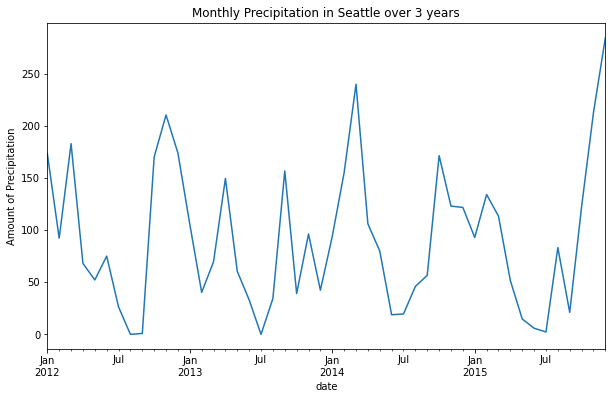

In [89]:
# visualize monthly precipitation

plt.figure(figsize= (10,6))
weather.resample('M').sum().precipitation.plot(label = 'sum of monthly precipitation')
plt.title("Monthly Precipitation in Seattle over 3 years")
plt.ylabel('Amount of Precipitation')
plt.show()

-----
### Flights
``` python
data.flights_20k()
```
1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay?
3. Does the day of the week make a difference in the delay amount?
4. Does the month make a difference in the delay amount?

-----
#### Bonus
```python
from vega_datasets import data
data.iowa_electricity()
```
1. For each row, calculate the percentage of the year's total that energy source provided.
2. Lineplot of generation over time, color by source
3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
5. Is the total generation increasing over time?
    - How would you control for increasing consumption over time when considering how much energy is coming from each source? 
    - express each number as a % of the year's total

-----
1. Use the sf_temps dataset
2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
4. Create pretty labels for time plots
5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

------
Explore the birdstrikes dataset.